# Malaria Image Detection (Using CNN Model )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models

Parasitized


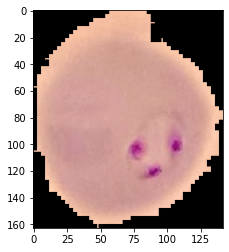

In [2]:
img=plt.imread("cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png")
plt.imshow(img)
print("Parasitized")
plt.show()

Uninfected


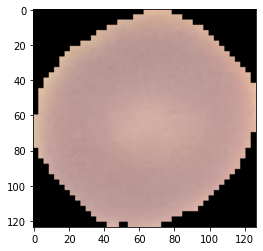

In [3]:
img=plt.imread("cell_images\\Uninfected\\C1_thinF_IMG_20150604_104919_cell_183.png")
plt.imshow(img)
print("Uninfected")
plt.show()

### Preparing Image Data

In [4]:
# Image Dataset Generator
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'cell_images',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
)

Found 27558 files belonging to 2 classes.


In [5]:
# Found 2 classes 
classes=dataset.class_names
classes

['Parasitized', 'Uninfected']

In [6]:
# Length of the Dataset
len(dataset)

862

Parasitized


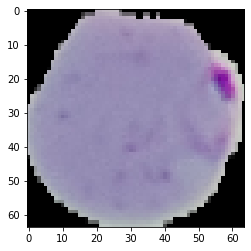

Parasitized


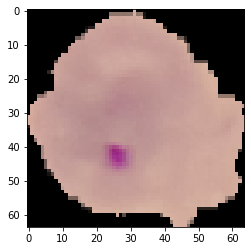

Parasitized


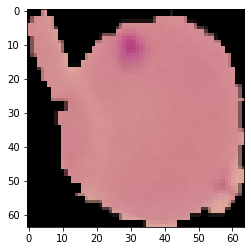

Uninfected


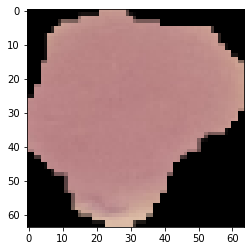

Uninfected


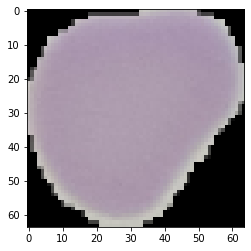

Parasitized


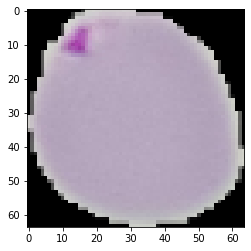

Uninfected


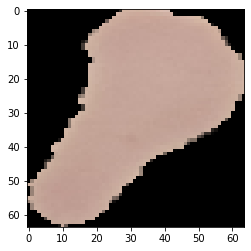

Parasitized


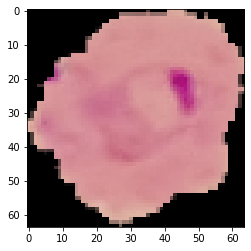

Parasitized


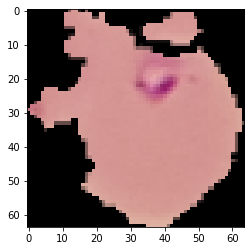

Parasitized


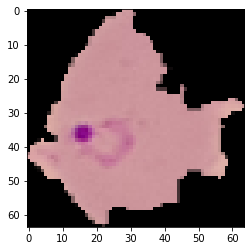

Uninfected


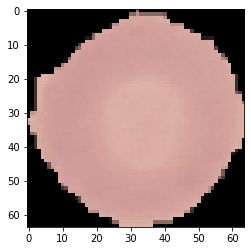

Parasitized


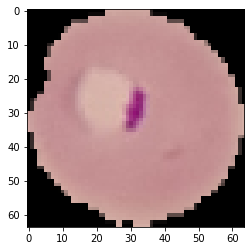

Uninfected


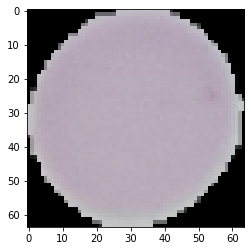

Parasitized


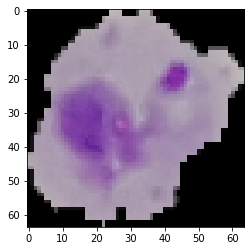

Uninfected


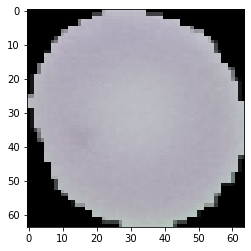

Uninfected


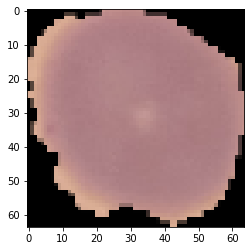

Parasitized


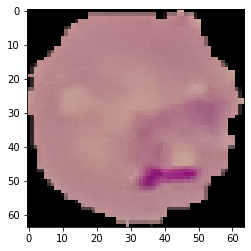

Parasitized


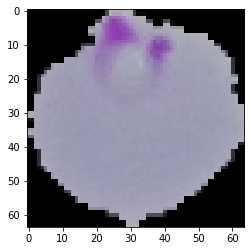

Parasitized


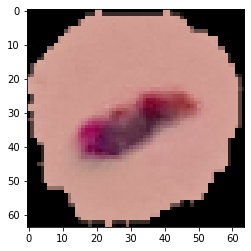

Parasitized


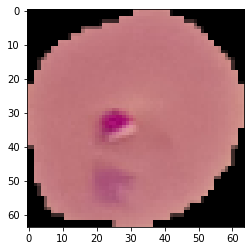

Uninfected


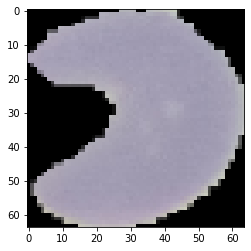

Uninfected


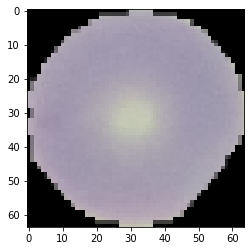

Uninfected


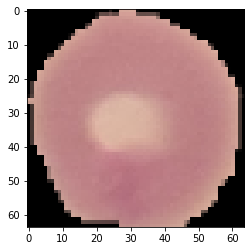

Parasitized


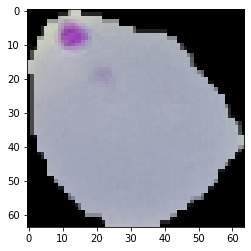

Uninfected


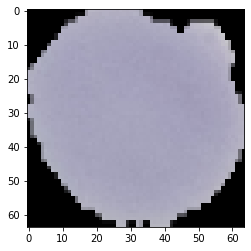

Uninfected


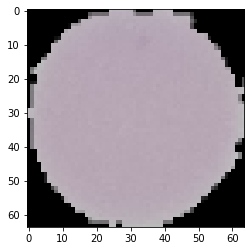

Parasitized


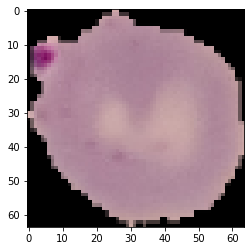

Parasitized


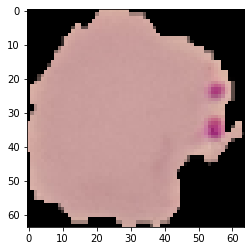

Parasitized


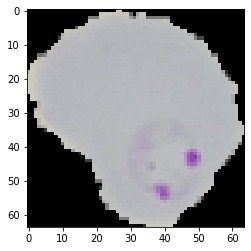

Uninfected


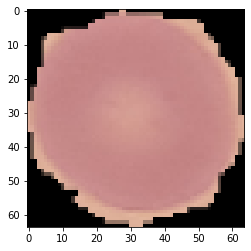

Uninfected


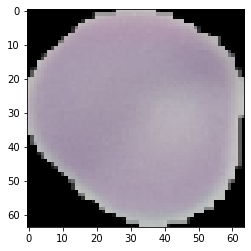

Uninfected


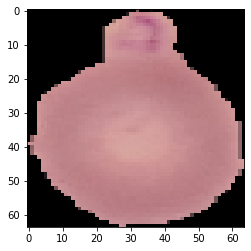

In [7]:
# Printing Some Images and their Labels

for image,label in dataset.take(1):
    for i in range(32):
        plt.imshow(image[i].numpy().astype('uint8'))
        l=label[i].numpy()
        if l==0:
            print("Parasitized")
        else:
            print("Uninfected")
        plt.show()

In [8]:
# Now Dividing into Train test and Validation
# Train I am keeping 80 percent and test and validation 10 percent each

In [9]:
len(dataset)*0.80
train=dataset.take(689)
rem=dataset.skip(689)

In [10]:
len(dataset)*0.10
test=rem.take(86)
validation=rem.skip(86)

In [11]:
print(len(dataset))
print(len(train))
print(len(test))
print(len(validation))

862
689
86
87


## Model Building (CNN)

In [12]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(64,64),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
# Actual Model Building Cnn

model=models.Sequential([resize_rescale])
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.build(input_shape=(32,64,64,3))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 64, 64, 3)           0         
                                                                 
 conv2d (Conv2D)             (32, 62, 62, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 31, 31, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 29, 29, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 14, 14, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 12, 12, 64)         

In [16]:
# Compiling and Fiting the Model

model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])


history=model.fit(train,epochs=10,batch_size=32,validation_data=validation)

Epoch 1/10
689/689 [==============================] - 98s 140ms/step - loss: 0.3262 - accuracy: 0.8511 - val_loss: 0.1731 - val_accuracy: 0.9438
Epoch 2/10
689/689 [==============================] - 97s 140ms/step - loss: 0.1476 - accuracy: 0.9532 - val_loss: 0.1540 - val_accuracy: 0.9511
Epoch 3/10
689/689 [==============================] - 99s 144ms/step - loss: 0.1326 - accuracy: 0.9573 - val_loss: 0.1473 - val_accuracy: 0.9507
Epoch 4/10
689/689 [==============================] - 96s 139ms/step - loss: 0.1224 - accuracy: 0.9593 - val_loss: 0.1324 - val_accuracy: 0.9561
Epoch 5/10
689/689 [==============================] - 97s 141ms/step - loss: 0.1132 - accuracy: 0.9622 - val_loss: 0.1320 - val_accuracy: 0.9536
Epoch 6/10
689/689 [==============================] - 96s 139ms/step - loss: 0.1033 - accuracy: 0.9640 - val_loss: 0.1285 - val_accuracy: 0.9543
Epoch 7/10
689/689 [==============================] - 96s 139ms/step - loss: 0.0970 - accuracy: 0.9667 - val_loss: 0.1338 - val_ac

#### Now Making Some Predictions

Actual :    Uninfected
1/1 [==============================] - 0s 64ms/step
Predicted :    Uninfected


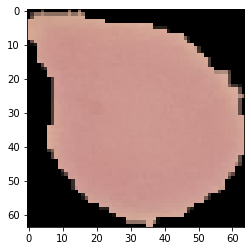

In [44]:
for image,label in test.take(1):
    
    plt.imshow(image[0].numpy().astype('uint8'))
    print("Actual : "," ",classes[label[0].numpy()])
    predictions=model.predict(image)
    index=0
    if predictions[0]>0.5:
        index=1
    else:
        index=0
    print("Predicted : "," ",classes[index])

## Predicting Using External Pics

In [40]:
image = tf.keras.preprocessing.image.load_img("cell_images\\Uninfected\\C1_thinF_IMG_20150604_104919_cell_183.png")
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 32ms/step


Uninfected


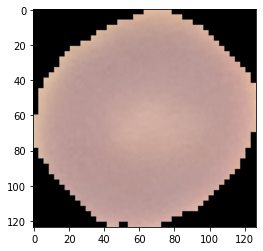

In [41]:
plt.imshow(image)
if predictions[0]>0.5:
    print("Uninfected")
else:
    print("Parasitized")

## Saving The Model

In [45]:
model.save("models/{1}")

INFO:tensorflow:Assets written to: models/{1}\assets


INFO:tensorflow:Assets written to: models/{1}\assets
